# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [9]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [66]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [11]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [12]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The range of the values for GRE is larger than the range of GPA, validated when you look at the min, max, and quartiles.

#### Question 4. Drop data points with missing data


In [34]:
df_raw = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Did a check below to see how many rows have null values.

In [33]:
print df_raw.isnull().sum()
df_raw[df_raw.isnull().any(axis=1)]

admit       0
gre         2
gpa         2
prestige    1
dtype: int64


,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


#### Question 6. Create box plots for GRE and GPA

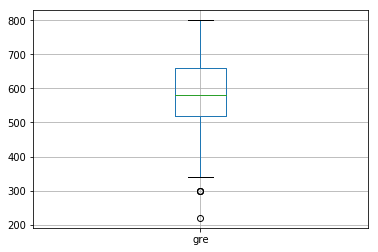

In [38]:
#boxplot 1
df_raw.boxplot(column='gre')

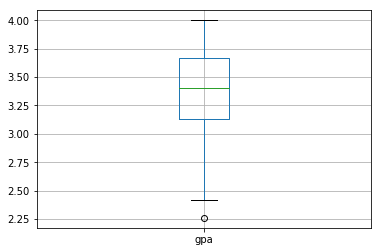

In [39]:
#boxplot 2 
df_raw.boxplot(column='gpa')

#### Question 7. What do this plots show?

Answer: They show the max, min, meaan, and quartiles

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1157b0ad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115a46150>]], dtype=object)

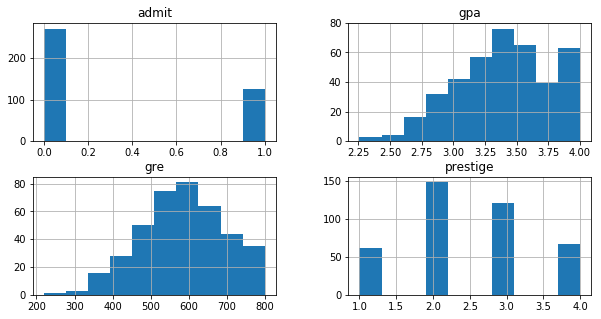

In [49]:
# plot the distribution of each variable 
df_raw.hist(figsize=(10,5))

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, both have a slight negative skew and kurtosis is less than 3, which mean shorter and thinner tails.

In [47]:
print 'gre skew: %s' % df_raw.gre.skew()
print 'gre kurtosis: %s' % df_raw.gre.kurt()
print 'gre mean: %s' % df_raw.gre.mean()
print 'gre median: %s' % df_raw.gre.median()
print 'gre mode: %s' % df_raw.gre.mode()

print 'gpa skew: %s' % df_raw.gpa.skew()
print 'gpa kurtosis: %s' % df_raw.gpa.kurt()
print 'gpa mean: %s' % df_raw.gpa.mean()
print 'gpa median: %s' % df_raw.gpa.median()
print 'gpa mode: %s' % df_raw.gpa.mode()

gre skew: -0.146046988216
gre kurtosis: -0.332864354651
gre mean: 587.858942065
gre median: 580.0
gre mode: 0    620.0
dtype: float64
gpa skew: -0.216888932969
gpa kurtosis: -0.563569899522
gpa mean: 3.3922418136
gpa median: 3.4
gpa mode: 0    4.0
dtype: float64


#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: You could remove some of the outliers to fix the skew.

#### Question 11. Which of our variables are potentially colinear? 

In [48]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: there is a slight positive correlation between GRE/GPA and admissions and negative correlation with prestige and admissions

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: To explore the relationship between admissions rate and presitge, we can run a regression model to see if knowing the undergrad prestige helps predict the grad school admission rates.

#### Question 14. What is your hypothesis? 

Answer: People that graduate from a more prestigious college are more likely to be accepted into grad school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [59]:
mask = df_raw.isnull().any(axis=1)
df_raw = df_raw[~mask]

#### 2. Bonus: Log transform the skewed data

In [65]:
df_raw['gre_log'] = np.log(df_raw.gre)
df_raw['gpa_log'] = np.log(df_raw.gpa)

#### 3. Advanced: Impute missing data

In [67]:
df_raw =  df_raw.fillna(df_raw.mean)